## 1. Perkenalan

Nama    : Adhy Arya Hendrata  
Dataset : [Credit-Card](./Adhy_Arya.csv)  
Object  : Penggambaran Kartu Kredit konsep clustering data dengan menggunakan Scikit-Learn 


### Problem Statement : 

Pengelompokan(cluster) dengan melihat sebaran data guna memahami tingkat nasabah pemegang kartu kredit.

### Latar Belakang

Data sebaran kartu kredit dengan total data kurang lebih 4475 data memiliki informasi tentang pembelian, limit kredit, pembayaran, dan balance setiap akun. Maka dari itu diperlukannya metode pengelompokan (cluster), tujuan pengelompokan adalah memudahkan saya untuk melihat bagaimana bentuk sebaran nasabah pada kartu kredit tersebut. Saya ingin melihat bagaimana sifat - sifat dari setiap kelompok(cluster) untuk mampu melakukan proses deskripsi pada produk kredit saat ini.

## 2.Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import pickle

# from data libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from feature_engine.outliers import Winsorizer

## 3. Square SQL

```sql
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')
project_id = "poetic-flight-418302" 
client = bigquery.Client(project=project_id)

credit_card = client.query('''
Select *
from `ftds-hacktiv8-project.phase1_ftds_005_bsd.credit-card-information`
''').to_dataframe()

df = credit_card

df.columns

df.info()

df = client.query('''
select 
  CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES,
  ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE,
  PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY,
  PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY,
  CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS,
  MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE,
from `ftds-hacktiv8-project.phase1_ftds_005_bsd.credit-card-information`
where MOD(CUST_ID, 2) = 1
''' ).to_dataframe()

df.to_csv('P1G6_Set_1_Adhy_Arya.csv',index=False)

from google.colab import files
files.download('P1G6_Set_1_Adhy_Arya.csv')

## 4. Data Loading

In [2]:
# load dataset 
Data_Original = pd.read_csv('P1G6_Set_1_Adhy_Arya.csv')

# melakukan duplikasi dataset
df = Data_Original.copy()


In [3]:
# memanggil dataframe
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       21

In [4]:
# manggil data 10 pertama
df.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
# manggil 10 terakhir
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

In [7]:
# info keseluruhan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [8]:
# mencari missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# memeriksa uniqvalue setiap kolom
df.nunique()

CUST_ID                             4475
BALANCE                             4433
BALANCE_FREQUENCY                     43
PURCHASES                           3203
ONEOFF_PURCHASES                    2093
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2169
PURCHASES_FREQUENCY                   46
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
PAYMENTS                            4362
MINIMUM_PAYMENTS                    4319
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [10]:
# mendrop missing value pada kolom minimum payments
df.fillna(df.mean(), inplace=True)

In [11]:
# memeriksa kembali apakah masih ada missing values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# memeriksa dataframe yang terduplikat
df.duplicated().sum()

0

In [13]:
# mengambil informasi keseluruhan dataframe
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           45.650000               88.620000      0.000000   
75%          575.220000              455.885000   1138.887754   
max        40624.060000            14686.100000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490579                    0.202301   
std               0.402907                    0.298203   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.250000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.363886                0.136132   
std                            0.397603                0.201036   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4475.000000   4475.000000   
mean           3.301229      14.929162   4494.878630   1740.075430   
std            7.134727      25.540814   3609.267706   2827.633858   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    376.913051   
50%            0.000000       7.000000   3000.000000    877.494612   
75%            4.000000      17.000000   6500.000000   1911.596530   
max          123.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4475.000000       4475.000000  4475.000000  
mean         873.976757          0.150224    11.518212  
std         2394.292856          0.289081     1.328925  
min            0.019163          0.000000     6.000000  
25%          170.457570          0.000000    12.000000  
50%          336.850732          0.000000    12.000000  
75%          873.976757          0.125000    12.000000  
max        76406.207520          1.000000    12.000000

**Observasi**  :
beberapa hasil observasi yang saya dapat adalah :
- kolom minimum payments memiliki missing value, langsung dihandle 
- ada satu kolom yg memiliki unique value lebih rendah daripada data numeric lainnya
- kolom cust_id hanya memiliki informasi id biasa 

dalam kasus ini saya menganggap data sudah siap dilanjutkan untuk proses ```Exploratory Data Analysis```

## 5. Exploratory Data Analysis (EDA)

#### Sebaran Data Purchase vs Payments 

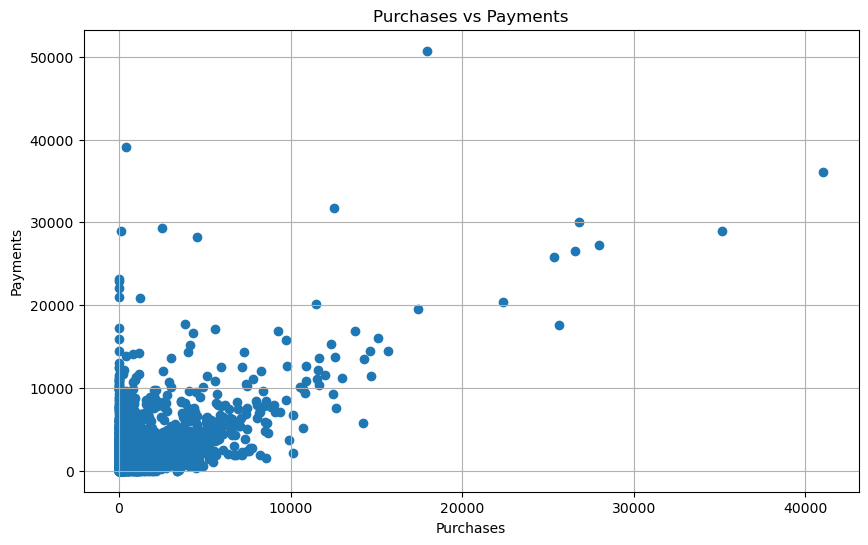

In [14]:
# Membuat grafik Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PURCHASES'], df['PAYMENTS'])
plt.title('Purchases vs Payments')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.grid(True)
plt.show()

Saya menggunakan scatter plot untuk melihat sebaran data nasabah yang melakukan pembayaran dalam satu aku. Berdasarkan grafik menunjukan adanya pembelian paling tinggi mencapai 50000, artinya nasabah ada melakukan pembayaran sebesar 50000, dengan jumlah pembelian kurang dari 20000. Jumlah pembelian terbanyak lebih dari 40000, dengan pembelian tertinggi kurang dari 40000.

#### Perbandingan antara Credit Limit dan Installment purchases

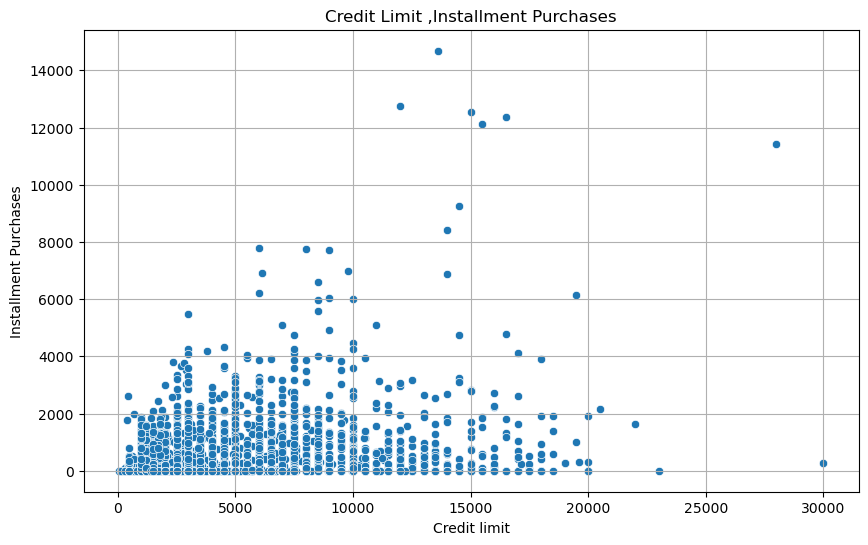

In [15]:
# Membuat grafik Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CREDIT_LIMIT',y='INSTALLMENTS_PURCHASES', data=df)
plt.title('Credit Limit ,Installment Purchases')
plt.xlabel('Credit limit')
plt.ylabel('Installment Purchases')
plt.grid(True)
plt.show()

Berdasarkan grafik diatas menjelaskan bahwa nasabah melakukan pembelian secara angsuran diatas 14000, dengan credit limit kurang lebih 14000. Nasabah dengan credit limit terbesar sebesar 30000, dengan pembelian angsuran rendah mendekati 0.

#### Sebaran Saldo dan Pembelian

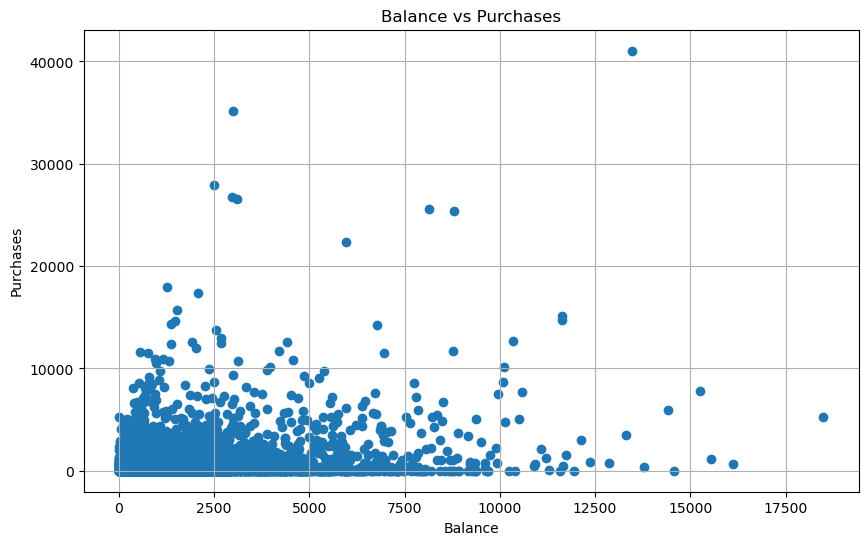

In [16]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['BALANCE'], df['PURCHASES'])
plt.title('Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.grid(True)
plt.show()

Sebaran saldo nasabah dan pembelian, mayoritas antara 0 sampai 10000, dengan pembelian yang sama sebesar 10000. Hal ini mayoritas nasabah lebih memilih untuk tidak melakukan pembelian lebih dari jumlah saldonya.

#### Sebaran Transaksi

c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

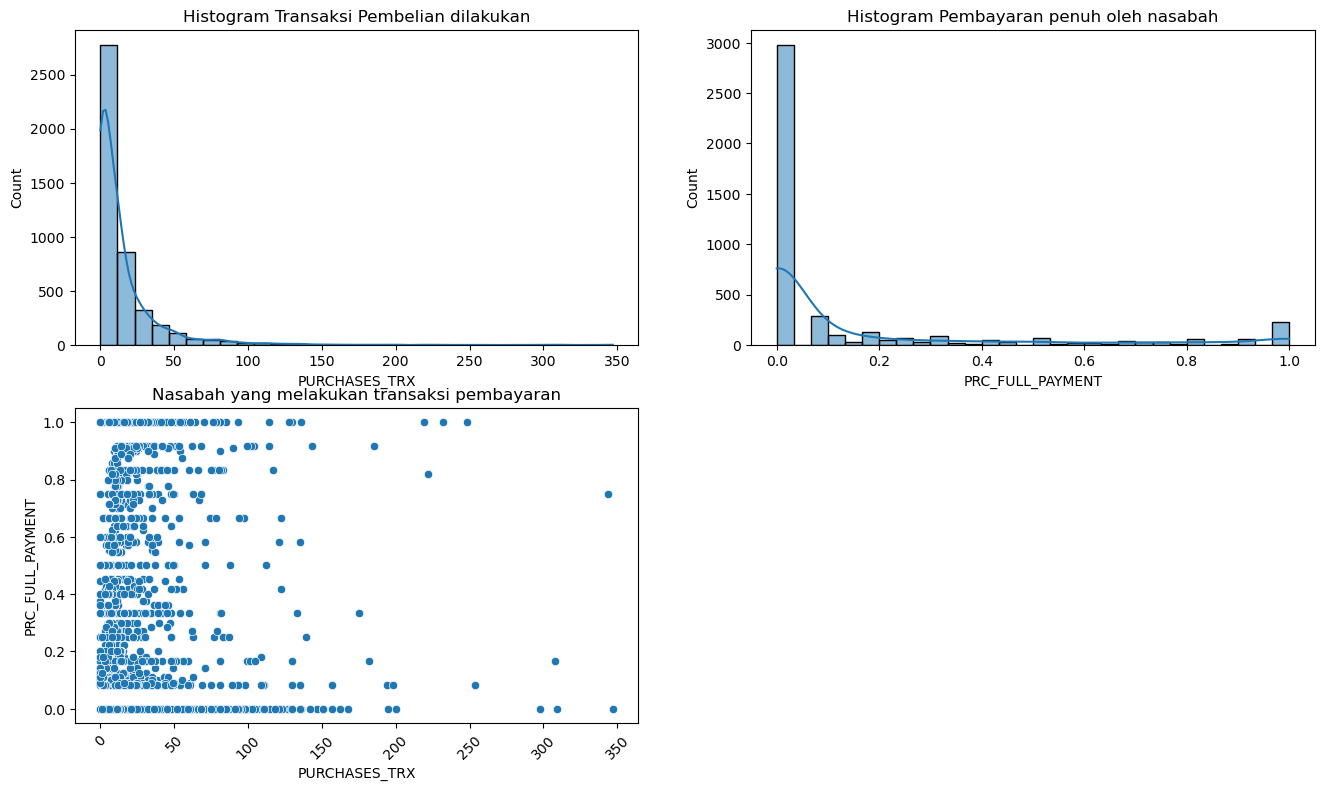

In [17]:
# Pembuatan histogram dan scatterplot

# membuat canvas 
plt.figure(figsize=(16,9))

# plot 1 dikiri atas
plt.subplot(2,2,1)
sns.histplot(df.PURCHASES_TRX,kde=True,bins=30)
plt.title('Histogram Transaksi Pembelian dilakukan')

# plot 2 dikanan atas
plt.subplot(2,2,2)
sns.histplot(df.PRC_FULL_PAYMENT,kde=True,bins=30)
plt.title('Histogram Pembayaran penuh oleh nasabah')

#plot 3 dikiri bawah  
plt.subplot(2,2,3)
sns.scatterplot(x='PURCHASES_TRX', y= 'PRC_FULL_PAYMENT', data=df )
plt.title('Nasabah yang melakukan transaksi pembayaran')
plt.xticks(rotation=45)

# Menunjukan visualisasi
plt.show

Observasi : 

- Menjelaskan histogram pertama rata2 nasabah tidak banyak melakukan transaksi, mayoritas dibawah 100. Pembelian tertinggi lebih dari 2500.
- Histogram kedua menjelaskan pembayaran penuh oleh nasabah, nasabah tersebar dengan frekuensi dari 0 - 1. Mayoritas nasabah melakukan pembayaran penuh pada frekuensi 0.0 s/d 0.2 dengan pembelian tertinggi sebesar 3000
- Histogram terakhir divisualisasikan dalam bentuk scatterplot menunjukan bahwa, nasabah dengan pembayaran penuh tersebar rata dari frekuensi 0.0 s/d 1. Transaksi pembelian terbesar kurang lebih 350, dan pembayaran penuh difrekuensi 1.

#### Sebaran Pembelian dengan limit Kredit

In [18]:
# Membuat scatter plot PURCHASES dengan CREDIT LIMIT
fig = px.scatter(df, x='PURCHASES', y='CREDIT_LIMIT', hover_data=['CUST_ID'], title='PURCHASES VS CREDIT LIMIT')
fig.update_layout(xaxis_title='PURCHASES', yaxis_title='CREDIT LIMIT')
fig.show()


observasi : 

- Ditemukan satu nasabah melakukan pembelian tertinggi sebesar 26k dengan limit kredit sebesar 30k. 
- Namun nasabah lain menunjukan bahwa pembelian mencapai 41k dengan limit kredit sebesar 17k
- kesimpulan mayoritas nasabah masih memasuk batas aman masing - masing.

#### Total sebaran data

c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and 

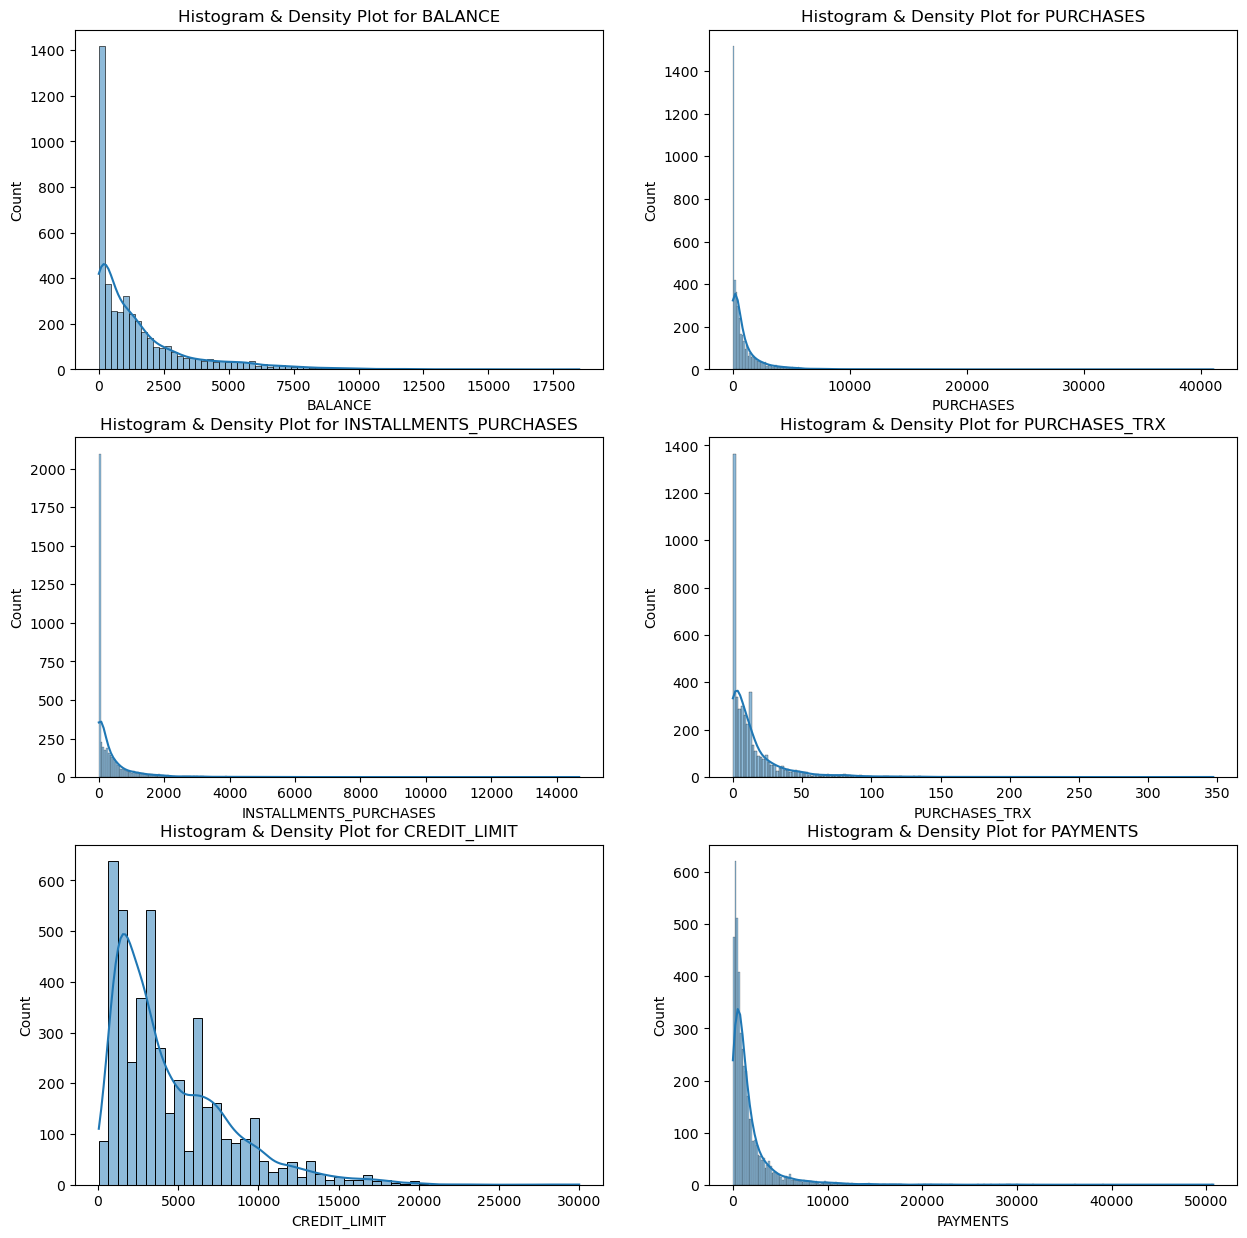

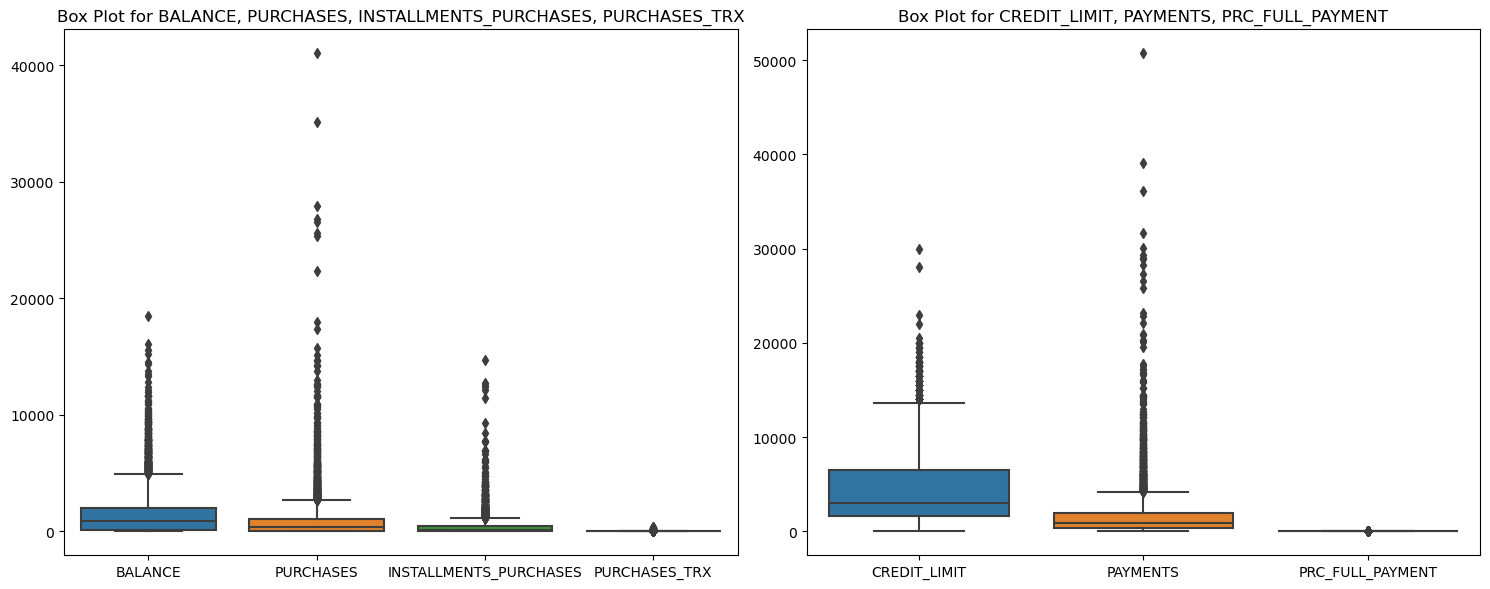

In [19]:
# Create subplots for histograms and density plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Histograms and Density Plots
for i, col in enumerate(['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS']):
    sns.histplot(df[col], ax=axs[i//2, i%2], kde=True)
    axs[i//2, i%2].set_title(f'Histogram & Density Plot for {col}')
    axs[i//2, i%2].set_xlabel(col)

# Create subplots for box plots
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df[['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX']], ax=axs2[0])
axs2[0].set_title('Box Plot for BALANCE, PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_TRX')

sns.boxplot(data=df[['CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']], ax=axs2[1])
axs2[1].set_title('Box Plot for CREDIT_LIMIT, PAYMENTS, PRC_FULL_PAYMENT')


plt.tight_layout()
plt.show()

#### Data Klasifikasi

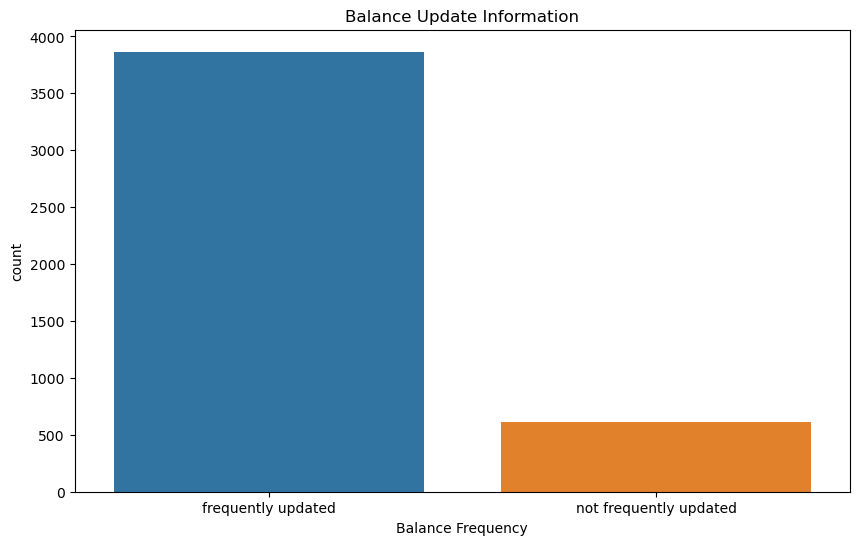

In [20]:
# memanggil dataframe
df = pd.DataFrame(df)

# membuat kelas
Update_Balanced = []

# membentuk looping
for i in df['BALANCE_FREQUENCY']:
    if i >= 1 or i >= 0.6 :
        Update_Balanced.append('frequently updated')
    else :
        Update_Balanced.append('not frequently updated')

df['Update Balance'] = Update_Balanced
# pemanggilan df
df

# membuat bar chart
calculate = df.groupby('Update Balance')['Update Balance'].count().sort_values(ascending=False)

# melakukan plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Balance Update Information')
plt.xlabel('Balance Frequency')
plt.ylabel('count')
plt.show()# membuat bar chart



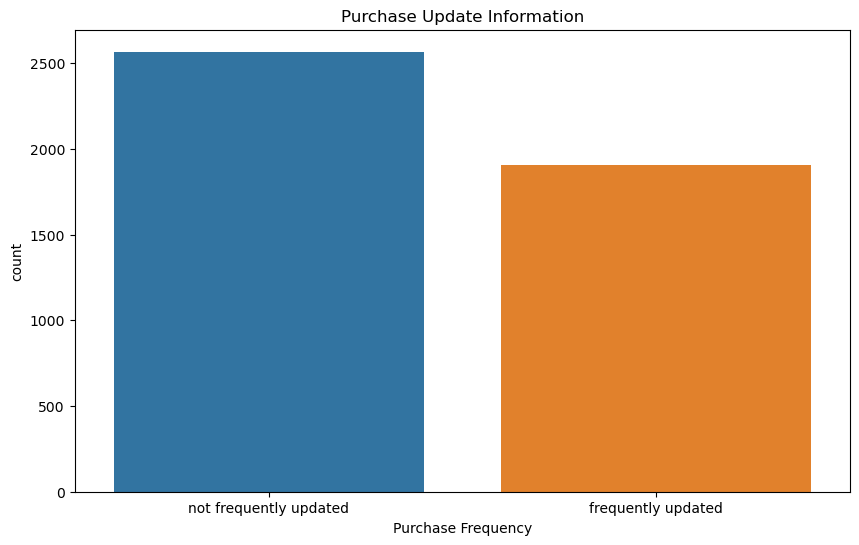

In [21]:
# memanggil dataframe
df = pd.DataFrame(df)

# membuat kelas
update_purchase = []

# membentuk looping
for i in df['PURCHASES_FREQUENCY']:
    if i >= 1 or i >= 0.6 :
        update_purchase.append('frequently updated')
    else :
        update_purchase.append('not frequently updated')

df['Update Purchase'] = update_purchase
# pemanggilan df
df

# membuat bar chart
calculate = df.groupby('Update Purchase')['Update Purchase'].count().sort_values(ascending=False)

# melakukan plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Purchase Update Information')
plt.xlabel('Purchase Frequency')
plt.ylabel('count')
plt.show()# membuat bar chart


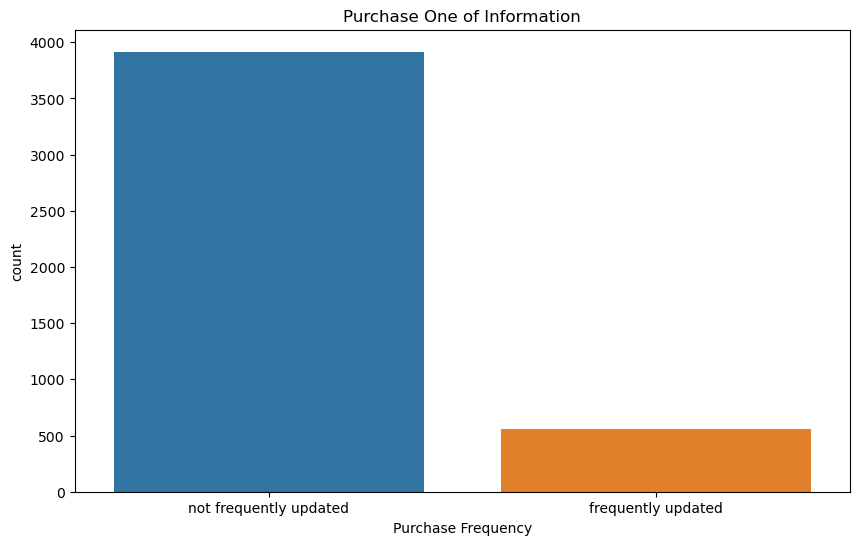

In [22]:
# memanggil dataframe
df = pd.DataFrame(df)

# membuat kelas
oneof_purchase = []

# membentuk looping
for i in df['ONEOFF_PURCHASES_FREQUENCY']:
    if i >= 1 or i >= 0.6 :
        oneof_purchase.append('frequently updated')
    else :
        oneof_purchase.append('not frequently updated')

df['One of Purchase'] = oneof_purchase
# pemanggilan df
df

# membuat bar chart
calculate = df.groupby('One of Purchase')['One of Purchase'].count().sort_values(ascending=False)


# melakukan plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Purchase One of Information')
plt.xlabel('Purchase Frequency')
plt.ylabel('count')
plt.show()# membuat bar chart

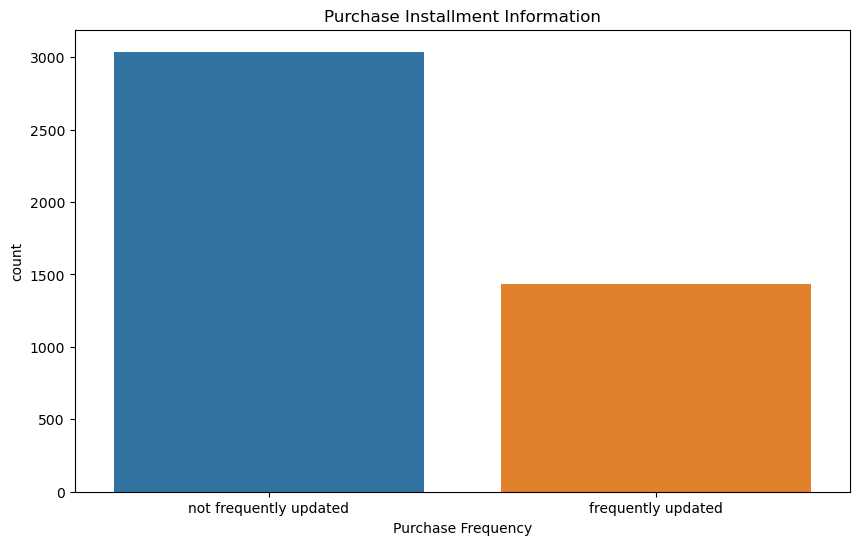

In [23]:
# memanggil dataframe
df = pd.DataFrame(df)

# membuat kelas
purinstall_purchases = []

# membentuk looping
for i in df['PURCHASES_INSTALLMENTS_FREQUENCY']:
    if i >= 1 or i >= 0.6 :
        purinstall_purchases.append('frequently updated')
    else :
        purinstall_purchases.append('not frequently updated')

df['Installment Purchase'] = purinstall_purchases
# pemanggilan df
df

# membuat bar chart
calculate = df.groupby('Installment Purchase')['Installment Purchase'].count().sort_values(ascending=False)

# melakukan plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Purchase Installment Information')
plt.xlabel('Purchase Frequency')
plt.ylabel('count')
plt.show()# membuat bar chart

## 6. Featuring Engineering

Proses ini saya akan melakukan beberapa langkah yaitu : 

1. Missing Value Handling
2. Handling Outlier
3. Featuring Scaling


In [24]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Update Balance',
       'Update Purchase', 'One of Purchase', 'Installment Purchase'],
      dtype='object')

Pada tahap ini saya melakukan drop kepada empat kolom klasifikasi, data tersebut sudah tidak diperlukan. Serta ```Cust_ID``` didrop karena data tidak diperlukan untuk proses ```Feature Engginering```.

In [25]:
drop_columns = ['Update Balance',
       'Update Purchase', 'One of Purchase', 'Installment Purchase']

df.drop(columns=drop_columns, inplace=True)

df = df.drop('CUST_ID', axis=1)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    3.833185              0.125      45.00             45.00   
1    0.000000              0.000     176.03            176.03   
2  757.964752              0.875     157.40            157.40   
3  264.566591              0.375    1150.00           1150.00   
4  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000        873.976757               0.0       8  
1     0.000000        873.976757               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

### 6.1 Missing Value Handling

Missing value handling sudah dilakukan saat data loading

### 6.2 Handling Outlier 

Bagian ini saya melakukan handling outlier, kasus ini saya melakukan handling dengan ```winzorizer```. Namun pada saat melakukan pengoperasian terjadi **error** pada kolom ```tenure```. Solusi yang dilakukan adalah dengan melakukan pembagian nununique, dan melakukan penggabungan.

In [26]:
df.skew()

BALANCE                              2.329009
BALANCE_FREQUENCY                   -2.026530
PURCHASES                            7.071706
ONEOFF_PURCHASES                     9.951057
INSTALLMENTS_PURCHASES               6.330630
CASH_ADVANCE                         5.638109
PURCHASES_FREQUENCY                  0.058755
ONEOFF_PURCHASES_FREQUENCY           1.548319
PURCHASES_INSTALLMENTS_FREQUENCY     0.508296
CASH_ADVANCE_FREQUENCY               1.834211
CASH_ADVANCE_TRX                     6.420104
PURCHASES_TRX                        4.747507
CREDIT_LIMIT                         1.498948
PAYMENTS                             5.747503
MINIMUM_PAYMENTS                    14.930445
PRC_FULL_PAYMENT                     1.975238
TENURE                              -2.954159
dtype: float64

In [27]:
print(df.shape)

(4475, 17)


In [28]:
# num_col = df.select_dtypes(include=np.number).columns.tolist()


In [29]:
# mempersiapkan kolom normal, skew, dan extreme
normal = []
skew = []
extreme = []

# looping pemanggilan
for i in df.columns.to_list():
    if df[i].nunique()>8:
        skewness = df[i].skew()
        if -0.5 < skewness < 0.5:
            normal.append(i)
        elif -1 <= skewness <= -0.5 or 0.5 <= skewness <=1:
            skew.append(i)
        elif skewness < 1 or skewness > 1:
            extreme.append(i)
        
# nge print panggilan normal ,skew ,extreme
print('normal:', normal)
print('skew:', skew)
print('extreme skew:', extreme)

normal: ['PURCHASES_FREQUENCY']
skew: ['PURCHASES_INSTALLMENTS_FREQUENCY']
extreme skew: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [30]:
df_winso = df

Batas

In [31]:
winsoriser_extreme = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=extreme)

In [32]:
df_capped = winsoriser_extreme.fit_transform(df_winso)

BALANCE - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



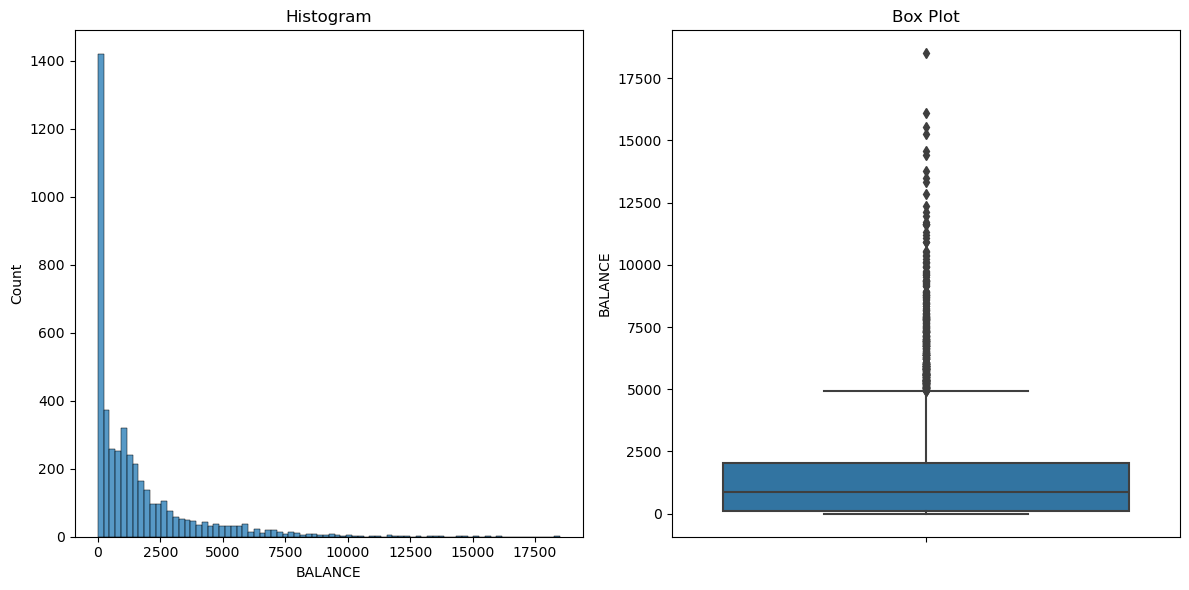


 BALANCE - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



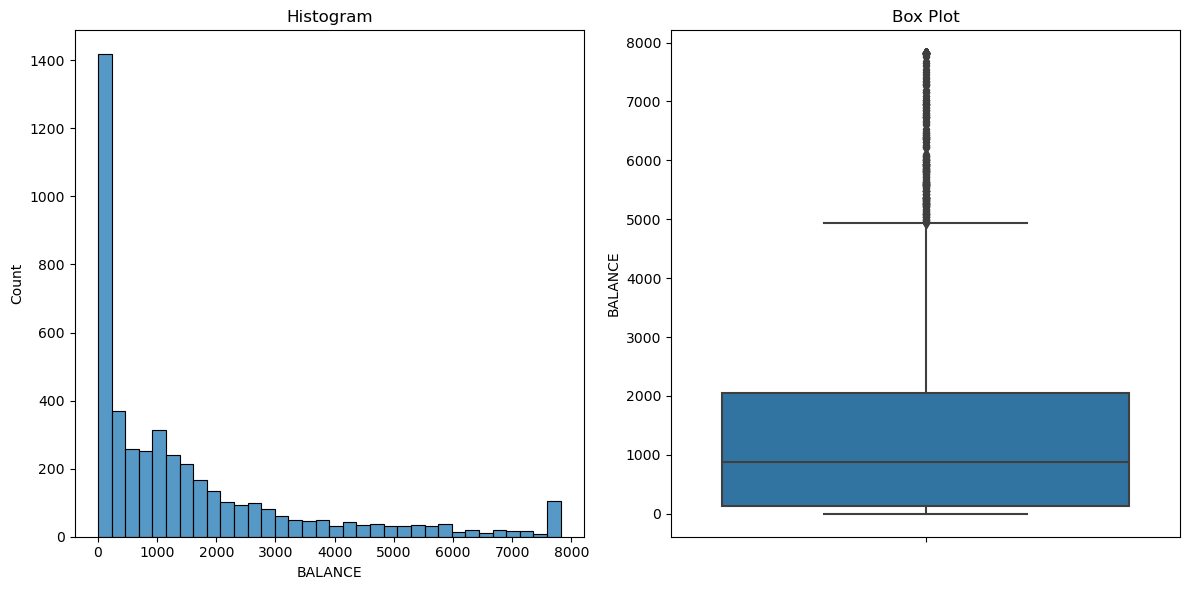

PURCHASES - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



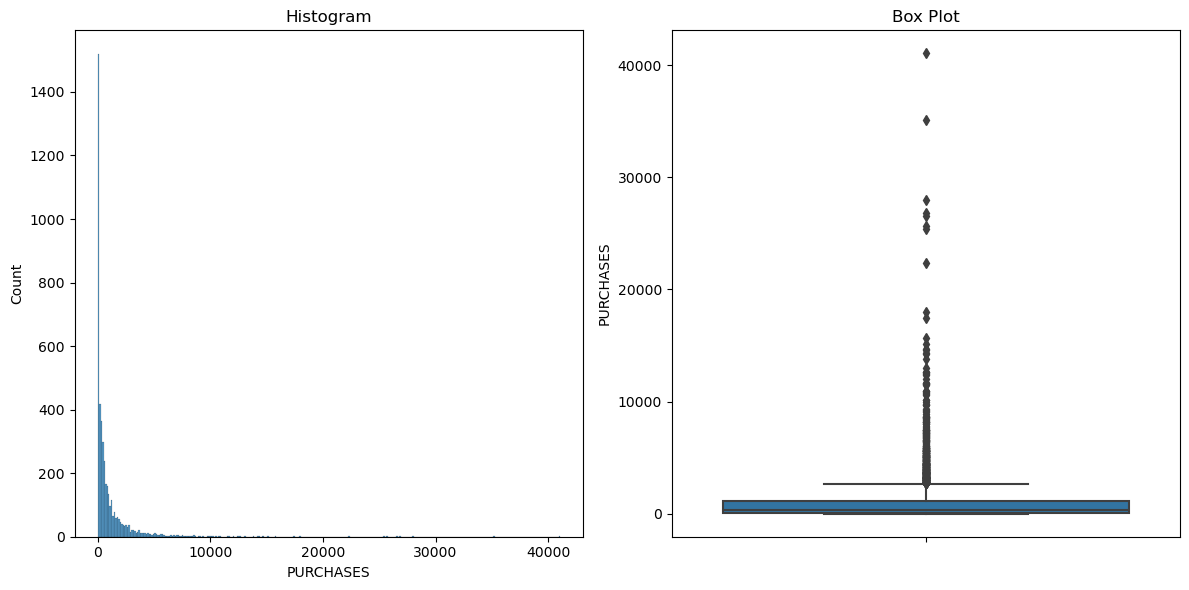


 PURCHASES - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



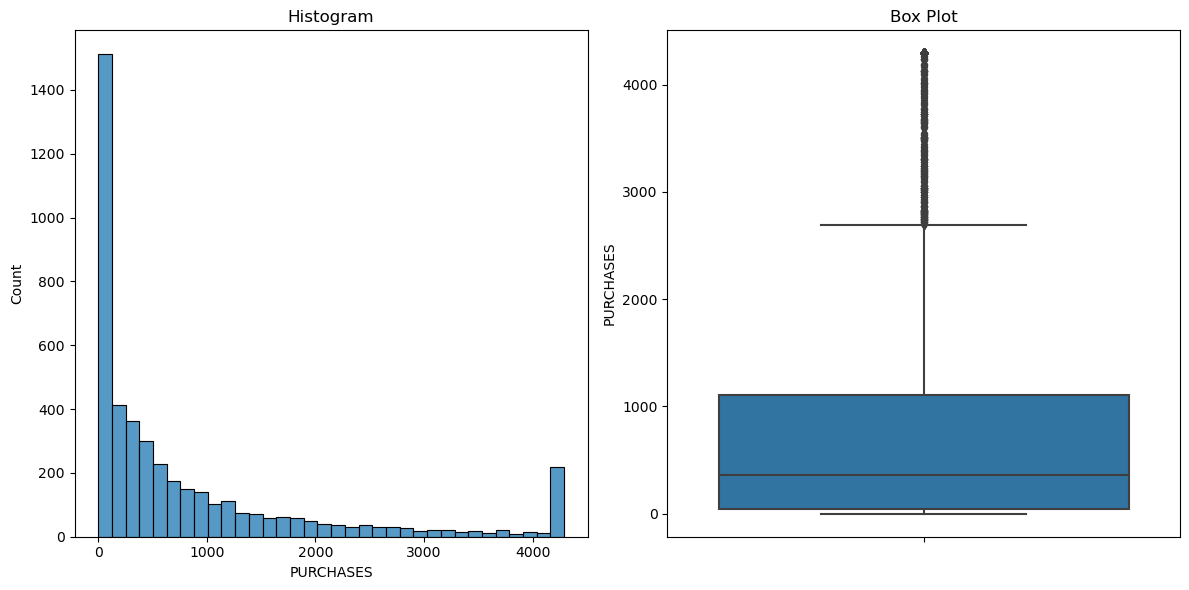

PAYMENTS - Before Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



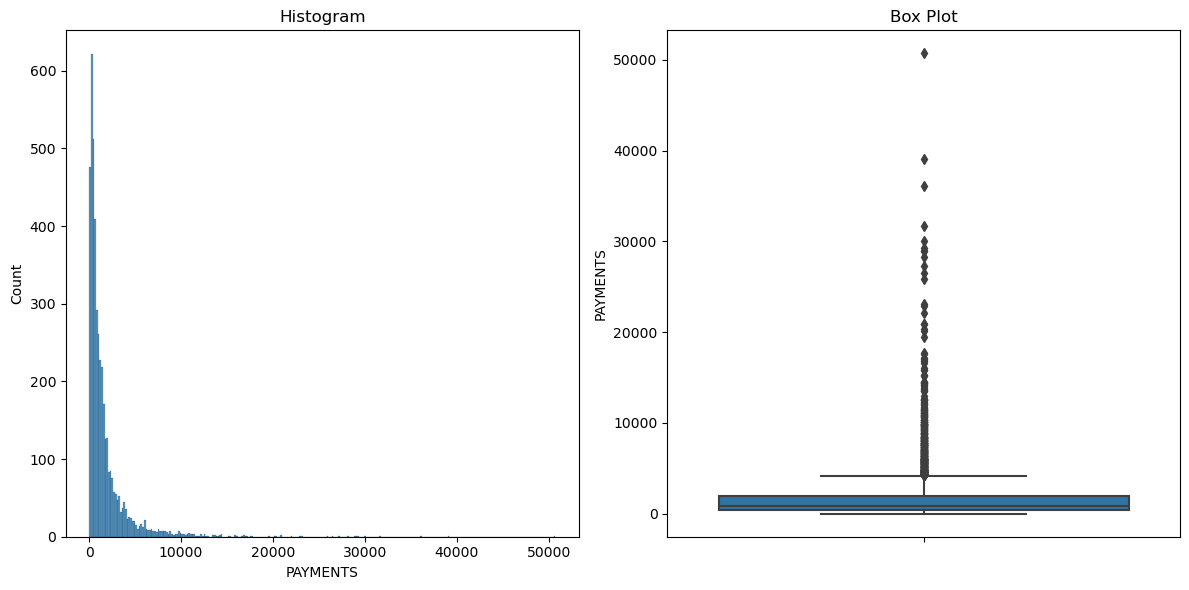


 PAYMENTS - After Capping


c:\Users\adhy arya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



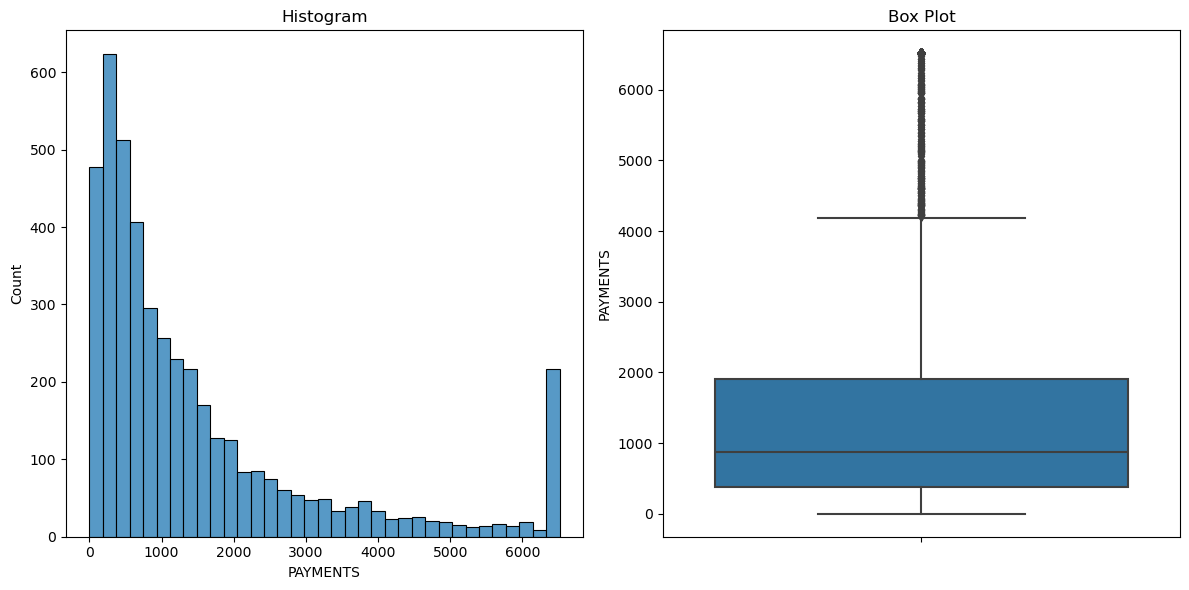

In [33]:
# Check the distribution before and after capping
def diagnostic_plots(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

    # Histogram
    sns.histplot(df[feature], ax=axes[0])
    axes[0].set_title('Histogram')

    # Box plot
    sns.boxplot(y=df[feature], ax=axes[1])
    axes[1].set_title('Box Plot')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
      

print('BALANCE - Before Capping')
diagnostic_plots(df, 'BALANCE')

print('\n BALANCE - After Capping')
diagnostic_plots(df_capped, 'BALANCE')

print('PURCHASES - Before Capping')
diagnostic_plots(df, 'PURCHASES')

print('\n PURCHASES - After Capping')
diagnostic_plots(df_capped, 'PURCHASES')

print('PAYMENTS - Before Capping')
diagnostic_plots(df, 'PAYMENTS')

print('\n PAYMENTS - After Capping')
diagnostic_plots(df_capped, 'PAYMENTS')

In [34]:
# # membuat fungsi def drop outliers normal
def drop_outliers_normal(df_capped, normal):
    for col in normal:
        avg = df_capped[col].mean()
        std = df_capped[col].std()
        upper_limit =  avg + 3 * std
        lower_limit = avg - 3 * std
        df_capped.drop(df_capped[(df_capped[col] > upper_limit) | (df_capped[col] < lower_limit)].index, inplace=True)

In [35]:
# melakukan drop outlier untuk baris normal
drop_outliers_normal(df_capped, ['PURCHASES_FREQUENCY'])

In [36]:
print(df_capped.shape)

(4475, 17)


**Observasi** : 
- Dilakukan ketiga kolom yaitu : `normal`, `skew`, dan `extreme`. Ditentukan setiap kolom dengan kategori ditentukan
- melakukan handling outlier dengan ***capping*** menggunakan **winsorizer**
- hasil menunjukan perubahan jelas kepada extreme skew, namun tidak ada perubahan pada data *skew* 
- melakukan drop outlier untuk sebaran normal, namun tidak ada perubahan.

### 6.3 Feature Scaling 

Melakukan scaling kepada fitur dengan menggunakan metode MinMaxScaler, karena tidak diketahuinya sebaran data tidak normal.

In [37]:
# scaling
model_scaler = MinMaxScaler()
model_scaler.fit(df_capped) #.fit() hanya boleh dilakukan terhadap train, tidak boleg di test - set
#melakukan proses perubahan skala
df_scaled = model_scaler.transform(df_capped)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.000490            0.00000   0.010487          0.019558   
1     0.000000            0.00000   0.041023          0.076506   
2     0.096964            0.71875   0.036681          0.068409   
3     0.033845            0.00000   0.268003          0.499809   
4     0.056366            1.00000   0.139828          0.260770   
...        ...                ...        ...               ...   
4470  1.000000            1.00000   0.000000          0.000000   
4471  0.133047            1.00000   0.000000          0.000000   
4472  0.169224            1.00000   0.000000          0.000000   
4473  0.135652            1.00000   0.000000          0.000000   
4474  0.441049            1.00000   0.047774          0.089096   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0      0.959795             0.000000   
4471                     0.0      0.305265             0.000000   
4472                     0.0      0.167335             0.000000   
4473                     0.0      0.323969             0.000000   
4474                     0.0      0.998355             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000            0.0000       0.015385      0.021277   
1                   0.000000            0.0000       0.015385      0.328605   
2                   0.000000            0.0000       0.092308      0.054374   
3                   0.000000            0.0000       0.015385      0.054374   
4                   0.000000            0.0000       0.015385      0.044917   
...                      ...               ...            ...           ...   
4470                0.545455            0.5625       0.000000      0.565012   
4471                0.545455            1.0000       0.000000      0.063830   
4472                0.545455            0.6875       0.000000      0.068558   
4473                0.545455            0.6250       0.000000      0.092199   
4474                0.545455            0.4375       0.015385      0.494090   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     0.000000          0.292831               0.0  0.333333  
1     0.000000          0.292831               0.0  0.333333  
2     0.229368          0.884090               0.0  0.333333  
3     0.464939          0.028618               0.0  0.333333  
4     0.033046          0.046181               0.0  0.333333  
...        ...               ...               ...       ...  
4470  0.378932          0.715117               0.0  0.833333  
4471  0.044528          0.096490               0.0  0.833333  
4472  0.158945          0.104813               0.0  

## 7. Model Definition

Pada part ini saya menggunakan `PCA`, dan proses dilakukan dengan mereduksi data tanpa mengurangi fitur data secara signifikan.

In [38]:
model_pca = PCA(n_components=0.95)
model_pca.fit(df_scaled)

df_scaled_pca = model_pca.transform(df_scaled)

Text(0, 0.5, 'Eigenvalues')

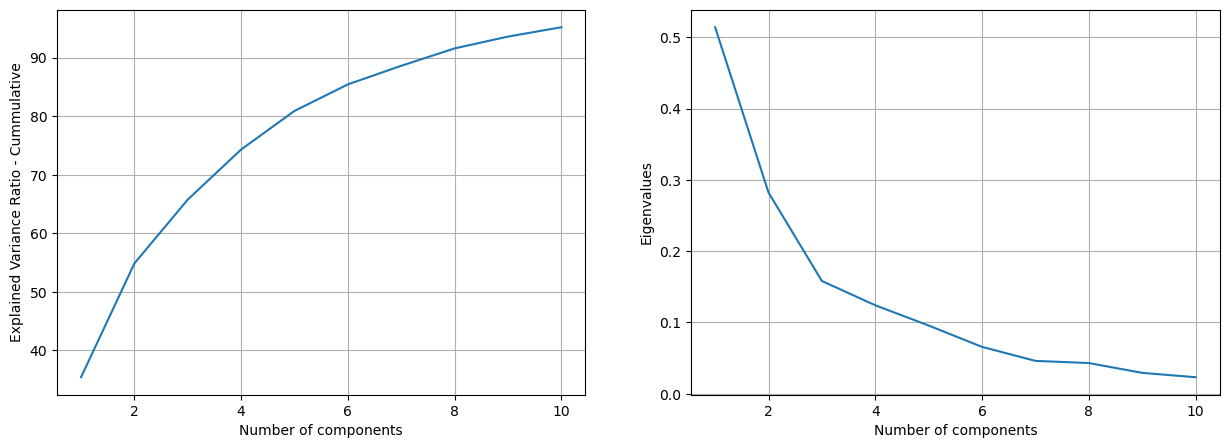

In [39]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(model_pca.explained_variance_ratio_) + 1), np.cumsum(model_pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(model_pca.explained_variance_) + 1), model_pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [40]:
cumsum = np.cumsum(model_pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

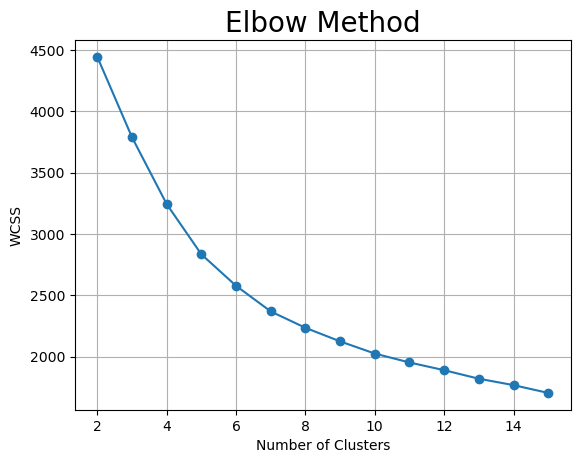

In [41]:
wcss = []
random_state = 17
max_cluster = 15
for i in range(2, max_cluster+1):
    model_km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    model_km.fit(df_scaled_pca)
    wcss.append(model_km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.27702530370221257
For n_clusters = 3 The average silhouette_score is : 0.24994796942251102
For n_clusters = 4 The average silhouette_score is : 0.23715627562886252
For n_clusters = 5 The average silhouette_score is : 0.2525464834048268
For n_clusters = 6 The average silhouette_score is : 0.25967491198841036
For n_clusters = 7 The average silhouette_score is : 0.2597597009571284
For n_clusters = 8 The average silhouette_score is : 0.2604310907086208
For n_clusters = 9 The average silhouette_score is : 0.2649452199268662
For n_clusters = 10 The average silhouette_score is : 0.26533304672372715
For n_clusters = 11 The average silhouette_score is : 0.2515390172858972
For n_clusters = 12 The average silhouette_score is : 0.25487897851908364
For n_clusters = 13 The average silhouette_score is : 0.24564101478038008
For n_clusters = 14 The average silhouette_score is : 0.22271990006317224


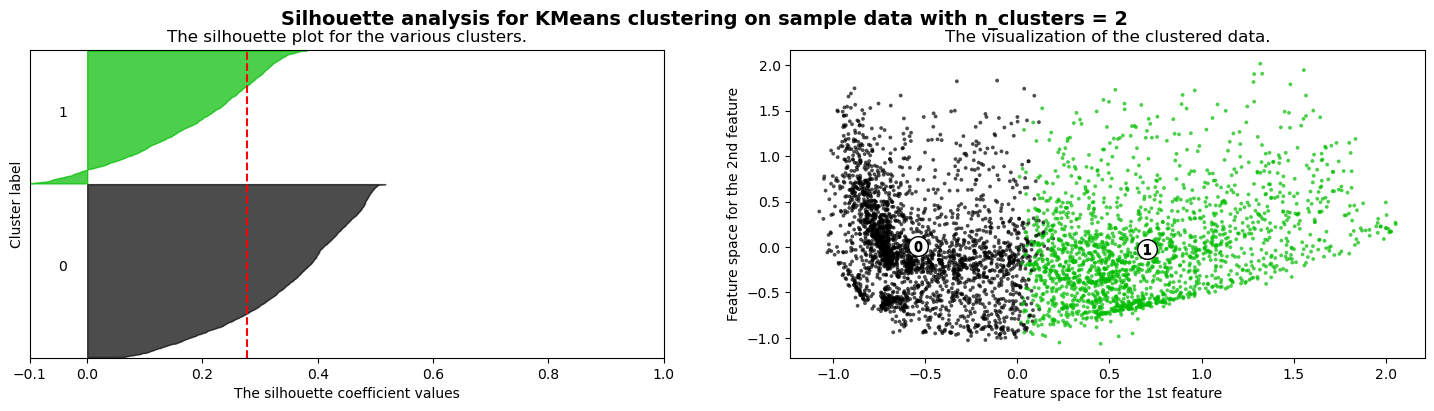

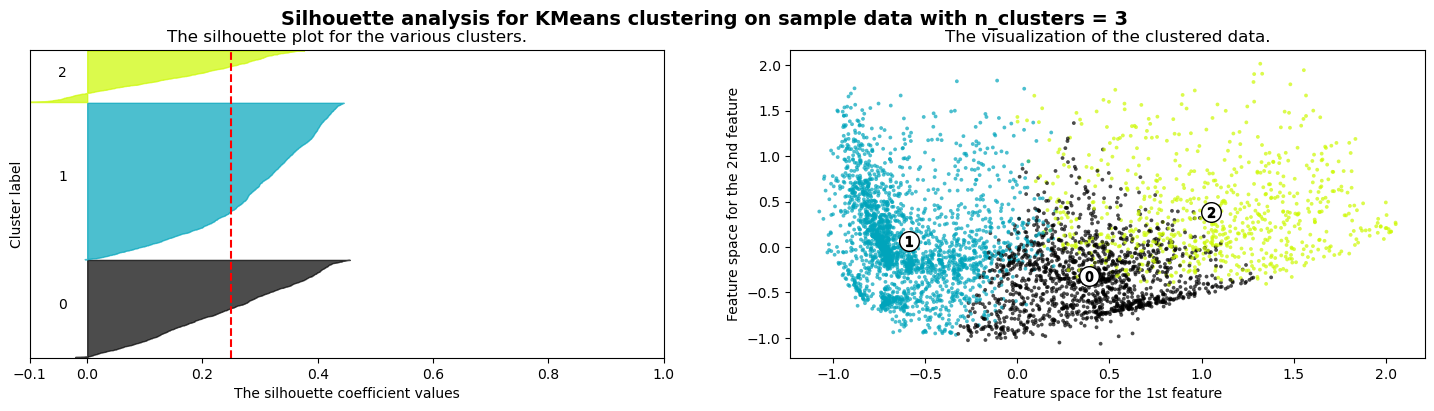

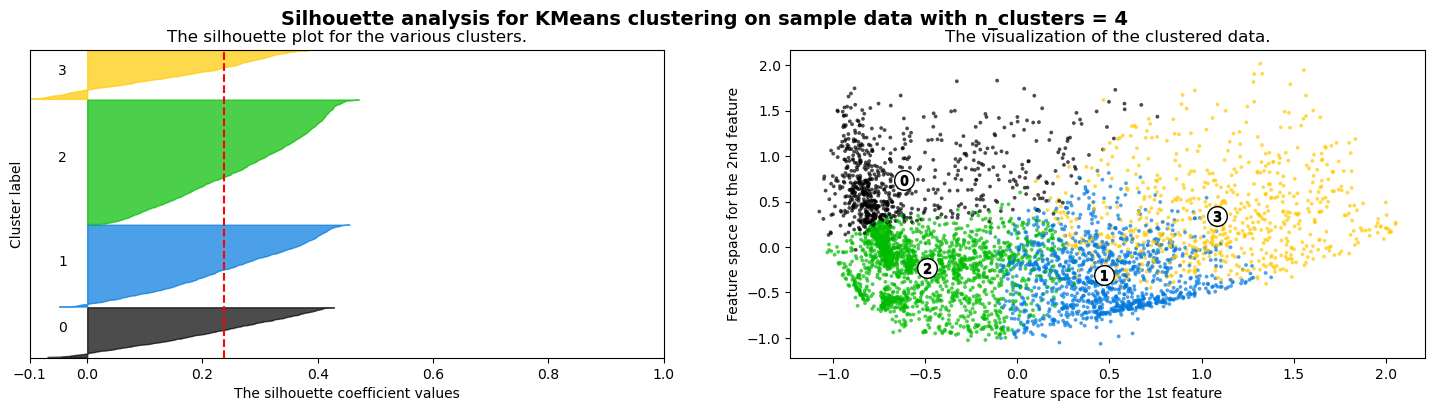

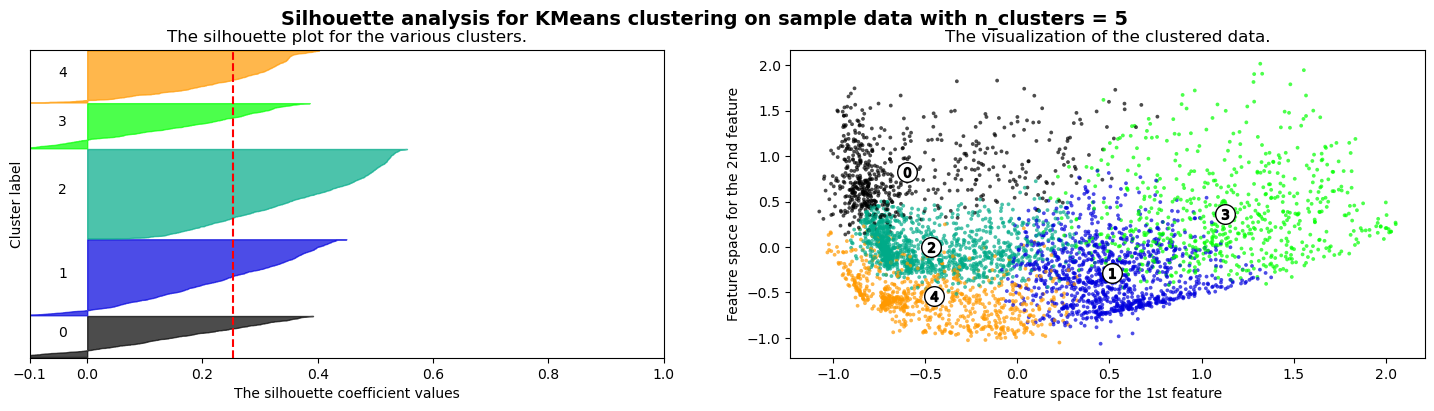

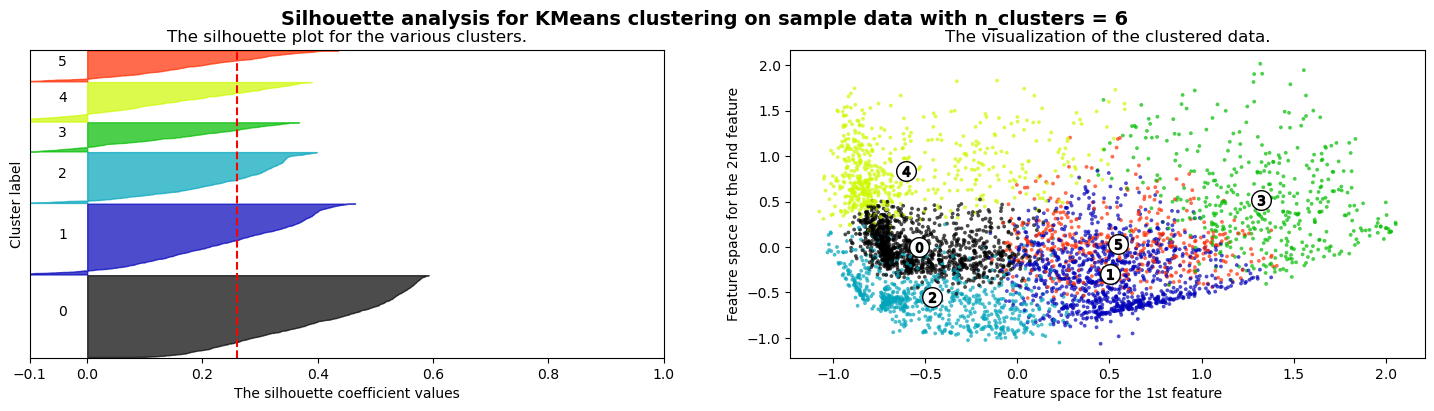

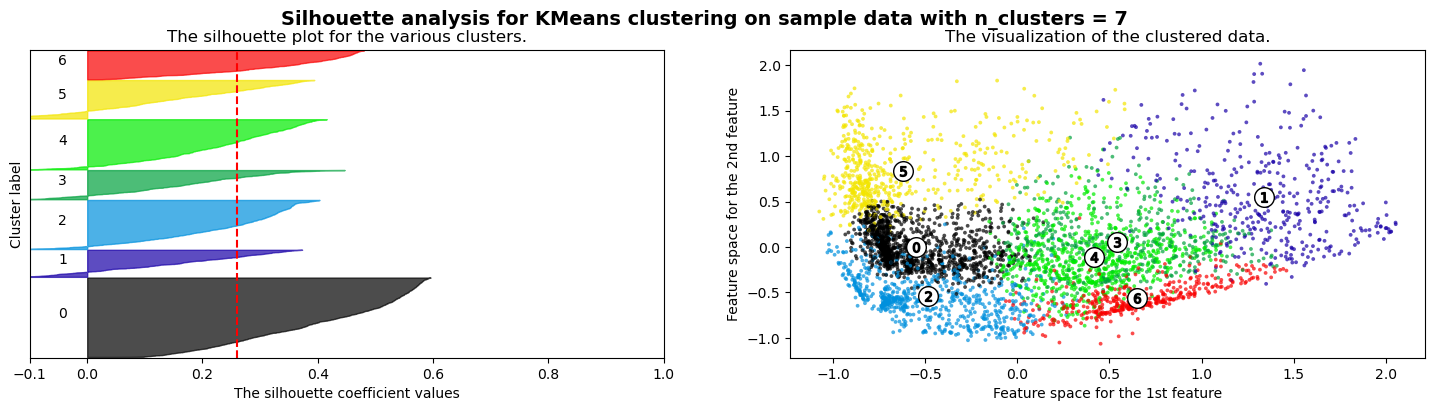

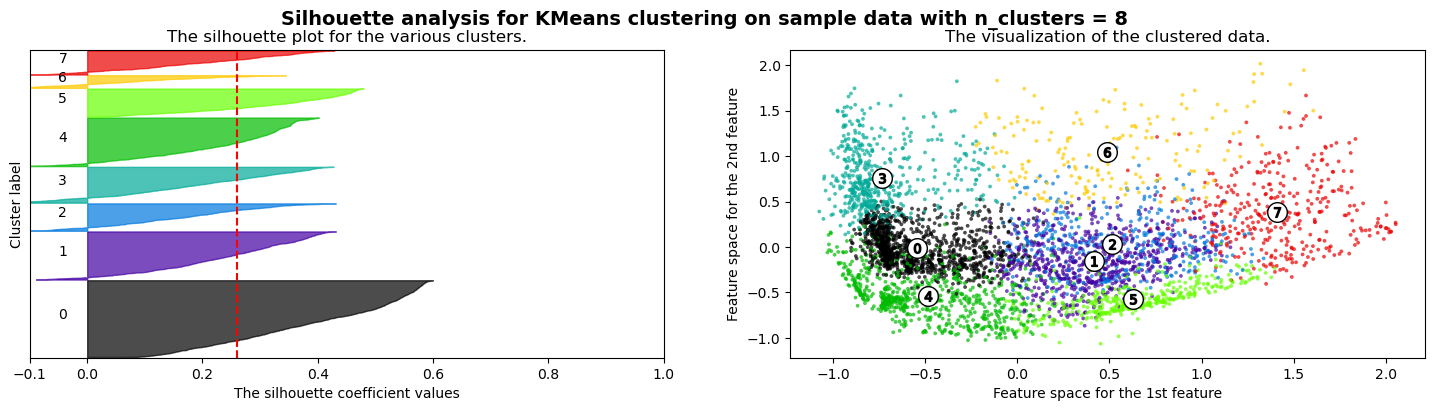

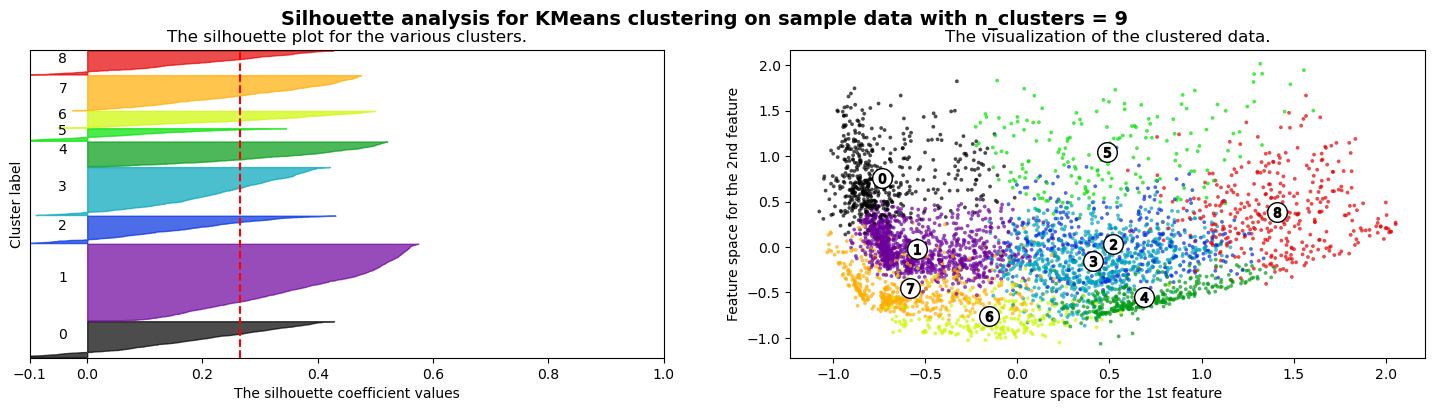

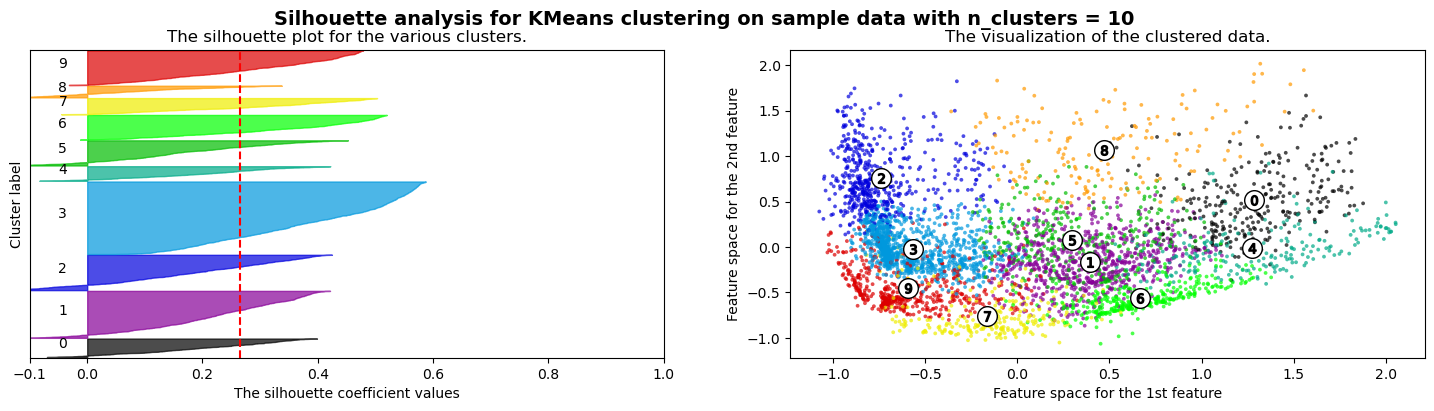

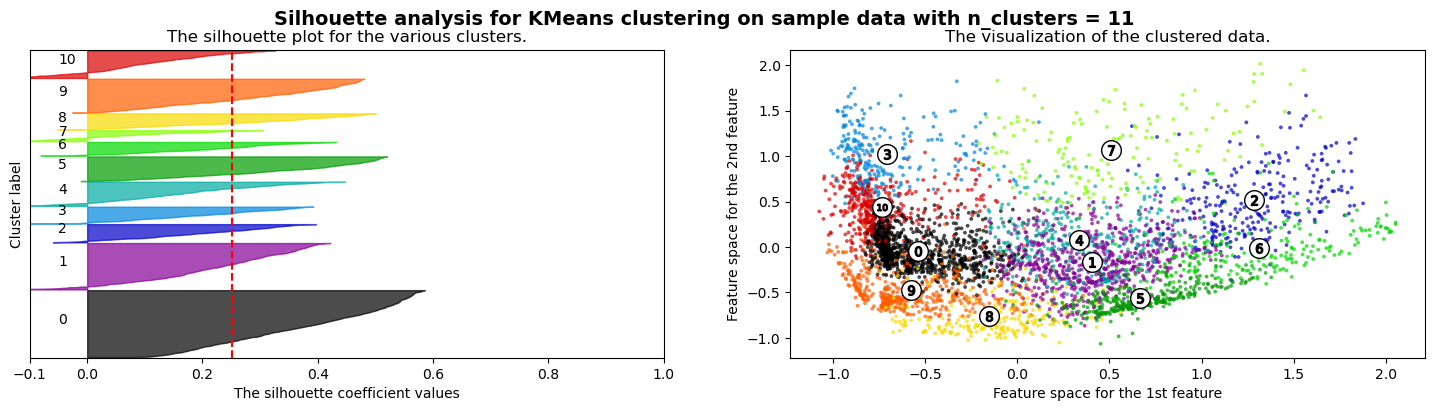

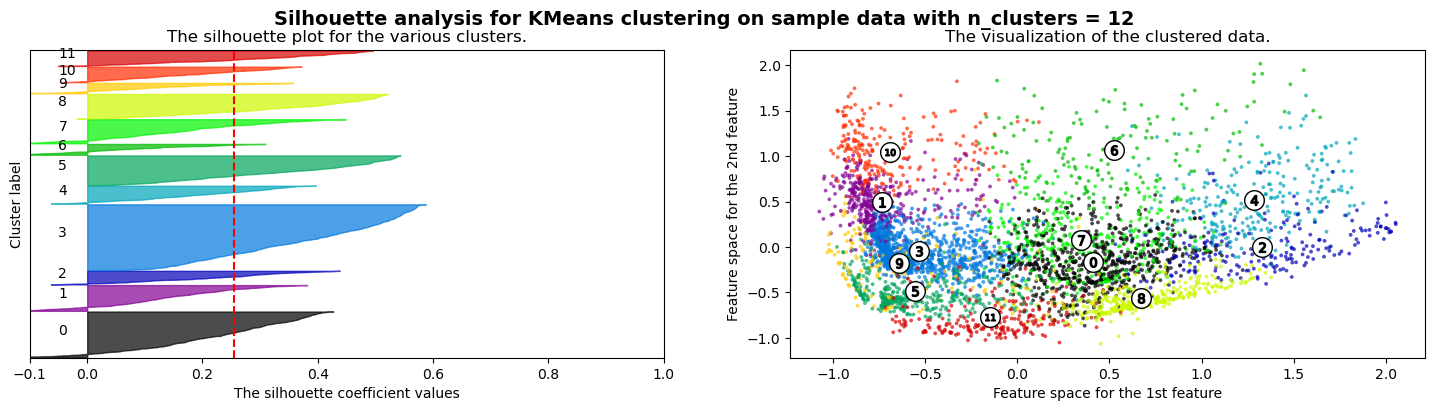

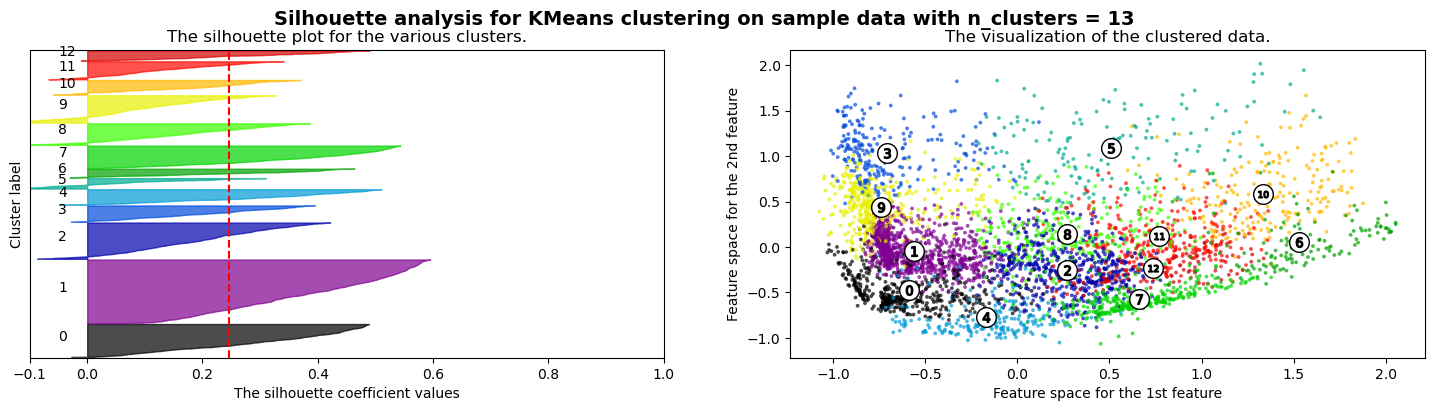

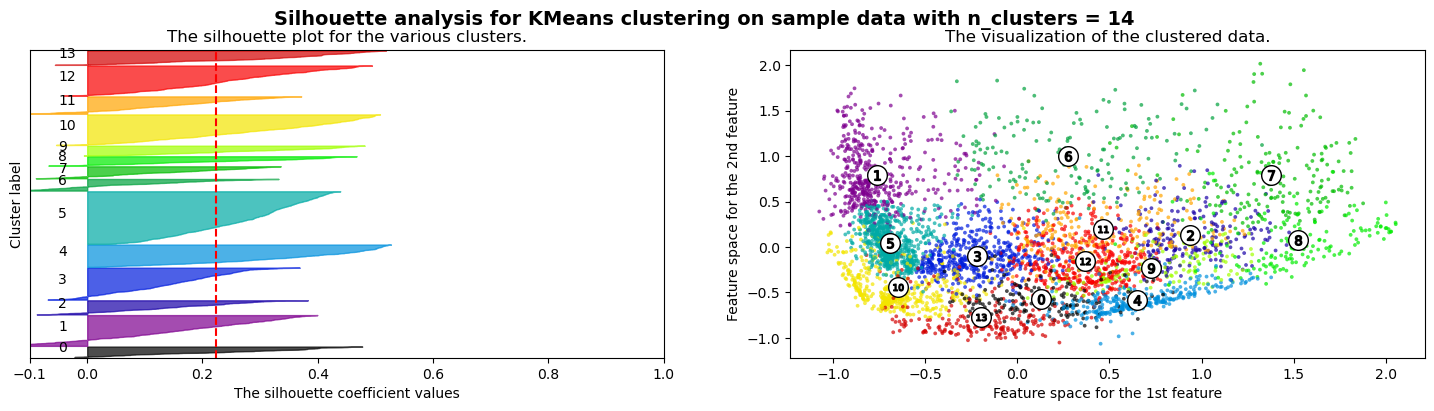

In [43]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

**Observasi** : 

- visualisasi grafik dengan menunjukan number of components
- penentuan jumlah features ditentukan 
- melakukan visualisasi berapa cluster yang akan digunakan 

Hasil : cluster yang digunakan sebanyak 4 

## 8. Model Training

### Clustering


In [44]:
# Train with optimal number of clusters

model_km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = model_km.fit_predict(df_scaled_pca)
pred

array([2, 2, 2, ..., 0, 0, 0])

In [45]:
# Insert clustering result into original dataset

df['cluster'] = pred
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        0.000000        873.976757               0.0       8        2  
1        0.000000        873.976757               0.0       8        2  
2     1494.480376       2638.598410               0.0       8        2  
3     3029.380326         85.428885               0.0       8        2  
4      215.316424        137.846006               0.0       8        2  
...           ...               ...               ...     ...      ...  
4470  2468.988022       2134.295731               0.0      11        0  
44

## 9.Model Evaluation of Exploratory Data Analysis (EDA)

#### Balance and Balance Frequency

<Axes: >

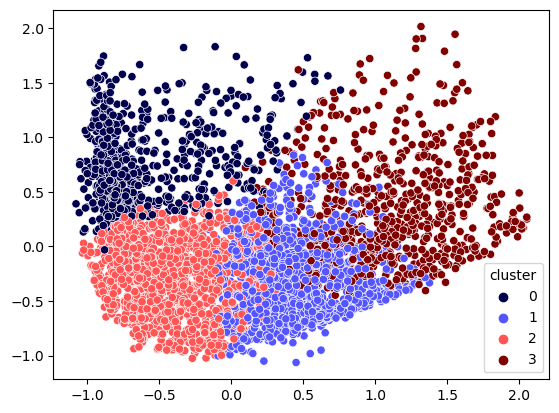

In [46]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled_pca)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled_pca)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df['cluster'], palette='seismic')

In [47]:
# Melakukan groupby berdasarkan cluster dan menghitung rata-rata
df_cluster = df.groupby('cluster').mean().reset_index()

# Membulatkan nilai rata-rata menjadi satu desimal
df_cluster = df.round(decimals=1)

# Tampilkan DataFrame yang sudah dibulatkan
df_cluster

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         3.8                0.1       45.0              45.0   
1         0.0                0.0      176.0             176.0   
2       758.0                0.9      157.4             157.4   
3       264.6                0.4     1150.0            1150.0   
4       440.6                1.0      600.0             600.0   
...       ...                ...        ...               ...   
4470   9629.8                1.0        0.0               0.0   
4471   1040.0                1.0        0.0               0.0   
4472   1322.8                1.0        0.0               0.0   
4473   1060.4                1.0        0.0               0.0   
4474   3447.7                1.0      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0           0.0                  0.1   
1                        0.0           0.0                  0.1   
2                        0.0           0.0                  0.1   
3                        0.0           0.0                  0.1   
4                        0.0           0.0                  0.1   
...                      ...           ...                  ...   
4470                     0.0        4372.4                  0.0   
4471                     0.0        1390.6                  0.0   
4472                     0.0         762.3                  0.0   
4473                     0.0        1475.9                  0.0   
4474                     0.0        4548.1                  0.1   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                            0.1                               0.0   
1                            0.1                               0.0   
2                            0.1                               0.0   
3                            0.1                               0.0   
4                            0.1                               0.0   
...                          ...                               ...   
4470                         0.0                               0.0   
4471                         0.0                               0.0   
4472                         0.0                               0.0   
4473                         0.0                               0.0   
4474                         0.1                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                        0.0                 0              1         500.0   
1                        0.0                 0              1        7000.0   
2                        0.0                 0              6        1200.0   
3                        0.0                 0              1        1200.0   
4                        0.0                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                     0.5                 9              0       12000.0   
4471                     0.5                18              0        1400.0   
4472                     0.5                11              0        1500.0   
4473                     0.5                10              0        2000.0   
4474                     0.5                 7              1       10500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0          0.0             874.0               0.0       8        2  
1          0.0             874.0               0.0       8        2  
2       1494.5            2638.6               0.0       8        2  
3       3029.4              85.4               0.0       8        2  
4        215.3             137.8               0.0       8        2  
...        ...               ...               ...     ...      ...  
4470    2469.0            2134.3               0.0      11        0  
4471     290.1             288.0               0.0      11        0  


#### Clustering Purchases and Payments

In [48]:
# membuat scatterplot dengan penanda pada disetiap data
fig = px.scatter(df_cluster, x='PURCHASES', y='PAYMENTS', color='cluster',
                 hover_data=['BALANCE'], title='PURCHASES VS PAYMENTS',
                 color_discrete_map={'0': 'blue', '1': 'red','2':'purple','3':'orange'})

fig.update_layout(xaxis_title='PURCHASES', yaxis_title='PAYMENTS')
fig.show()

**Total Cluster**

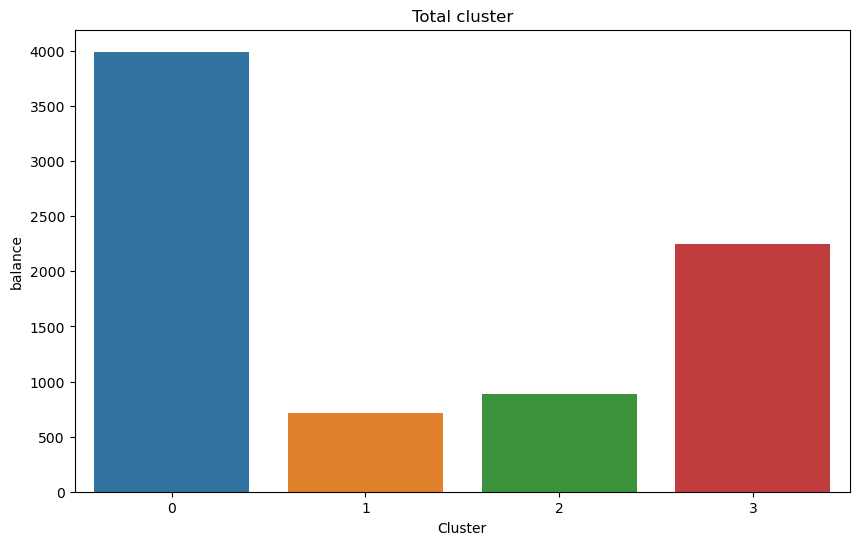

In [49]:
calculate = df.groupby('cluster')['BALANCE'].mean().sort_values(ascending=False)

# Create Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Total cluster')
plt.xlabel('Cluster')
plt.ylabel('balance')
plt.show()

Bisa dilihat dalam bar plot khusus saldo(balance) cluster 0 memiliki keunggulan dengan maksimal saldo sebesar 4000. 

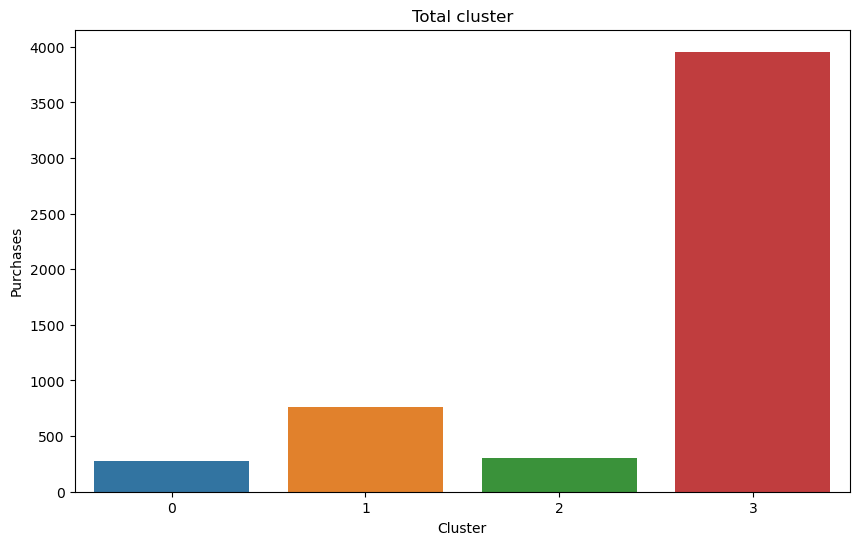

In [50]:
calculate = df.groupby('cluster')['PURCHASES'].mean().sort_values(ascending=False)

# Create Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Total cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchases')
plt.show()

Hal berbanding terbalik dengan proses pembelian, bahwa cluster no 3 menjadi mayoritas dalam keseluruhan data. 

#### Clustering Credit Limit and Installment Purchases 

In [51]:
# membuat scatterplot dengan penanda pada disetiap data
fig = px.scatter(df_cluster, x='CREDIT_LIMIT', y='INSTALLMENTS_PURCHASES', color='cluster',
                 hover_data=['PURCHASES'], title='Credit limit dan angsuran nasabah',
                 color_discrete_map={'0': 'blue', '1': 'red','2':'purple','3':'orange'})

fig.update_layout(xaxis_title='CREDIT LIMIT', yaxis_title='INSTALLMENT PURCHASES')
fig.show()

#### Cluster Balance and Purchases

In [52]:
# membuat scatterplot dengan penanda pada disetiap data
fig = px.scatter(df_cluster, x='BALANCE', y='PURCHASES', color='cluster',
                 hover_data=['CREDIT_LIMIT'], title='Saldo dan Pembelian',
                 color_discrete_map={'0': 'blue', '1': 'red','2':'purple','3':'orange'})

fig.update_layout(xaxis_title='BALANCE', yaxis_title='PURCHASES')
fig.show()

#### Clustering sebaran Transaksi 

<function matplotlib.pyplot.show(close=None, block=None)>

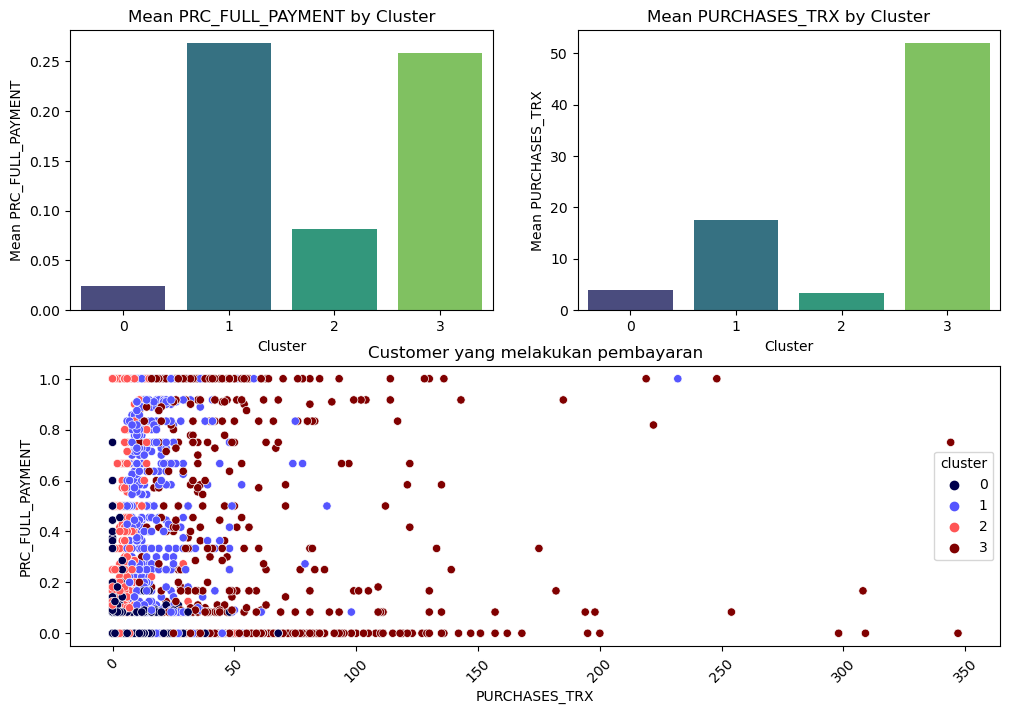

In [53]:
# membuat canvas 

# membuat subplots
plt.figure(figsize=(12, 8))
# menghitung mean prc full payment setiap cluster
mean_values = df.groupby('cluster')['PRC_FULL_PAYMENT'].mean().reset_index()
# plot 1 on the left 
plt.subplot(2, 2, 1)
sns.barplot(x='cluster', y='PRC_FULL_PAYMENT', data=mean_values, palette='viridis')
plt.title('Mean PRC_FULL_PAYMENT by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean PRC_FULL_PAYMENT')


# menghitung mmean purchase trx setiap cluster
mean_values = df.groupby('cluster')['PURCHASES_TRX'].mean().reset_index()
# plot 2 on the right 
plt.subplot(2, 2, 2)
sns.barplot(x='cluster', y='PURCHASES_TRX', data=mean_values, palette='viridis')
plt.title('Mean PURCHASES_TRX by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean PURCHASES_TRX')


#plot 2 on the right 
plt.subplot(2,1,2)
sns.scatterplot(x='PURCHASES_TRX', y= 'PRC_FULL_PAYMENT', data=df, hue='cluster', palette='seismic' )
plt.title('Customer yang melakukan pembayaran')
plt.xticks(rotation=45)

# menunjukan visual
plt.show

#### Clustering Purchases and Credit Limit

In [54]:
# membuat scatterplot dengan penanda pada disetiap data
fig = px.scatter(df_cluster, x='PURCHASES', y='CREDIT_LIMIT', color='cluster',
                 hover_data=['TENURE'], title='PURCHASES AND CREDIT LIMIT',
                 color_discrete_map={'0': 'blue', '1': 'red','2':'purple','3':'orange'})

fig.update_layout(xaxis_title='PURCHASES', yaxis_title='CREDIT_LIMIT')
fig.show()

#### Total Cluster

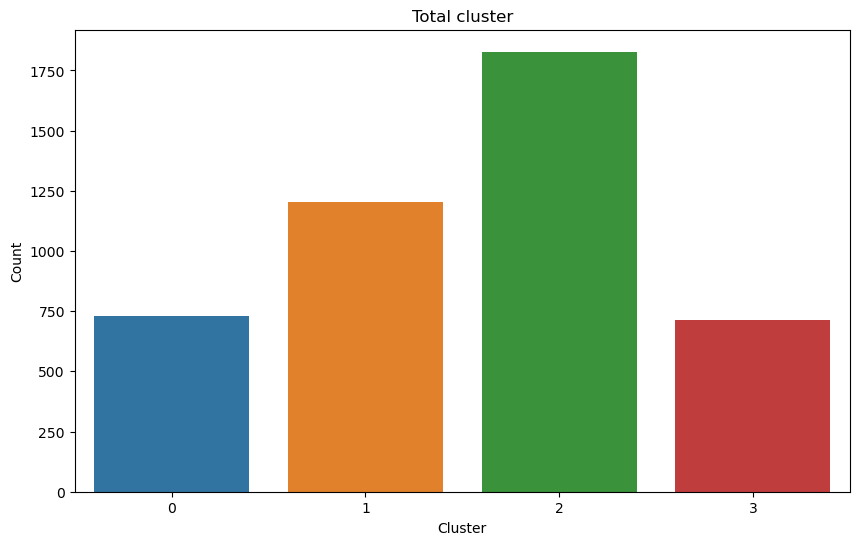

In [55]:

calculate = df.groupby('cluster')['cluster'].count().sort_values(ascending=False)

# Create Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Total cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

## 10. Model Saving

In [56]:
# save the files ! 
with open('model_scaler.pkl', 'wb') as file_1 : # wb = write binary
    pickle.dump(model_scaler,file_1)
    
with open('model_pca.pkl', 'wb') as file_2 : # wb = write binary
    pickle.dump(model_pca,file_2)
    
with open('model_km.pkl', 'wb') as file_3 : # wb = write binary
    pickle.dump(model_km,file_3)


## 11. Model Inference

Penjelasan di notebook baru

## 12. Kesimpulan

## Conceptual Problems

### 1.  Inertia pada algorithma K-Means

Inertia berdasarkan pengertian mengukur seberapa besar penyebaran object dalam cluster, tujuannya mengetahui nilai inertia tersebut. Hasil nilai bila semakin kecil maka hasilnya akan baik. Perhitungan `Kmeans()` akan membantu untuk memusatkan kluster pada data.

### 2. Elbow Method

**Elbow Method**

Penggunakan metode elbow masih sama dengan inertia dengan menggunakan perhitungan K - means. Tujuannya juga mencari nilai optimal cluster, dapat dilihat dari grafik yang membentuk siku. Pengukuran yang dilakukan dengan cara melihhat titik data yang berdekatan dengan pusat cluster. Penggunaan elbow digunakan, dikarenakan lebih mudah menentukan cluster secara visual, dan pemahaman lebih sederhana. 

Penilaian metode elbow juga bisa lebih subyektivitas karena pemilihan juga tergantung bagaimana memahami bentuk data pada grafik tersebut. Namun, hal tersebut bisa menjadi kelemahan dikarenakan, apabila menemukan data yang tidak sesuai, maka akan sulit untuk melihat sudut "elbow" tersebut. Hasil cluster kemungkinan akan tidak optimal.

## Model Analysis

**Balance and Balance Frequency**

**Observasi** : 

visualisasi dilakukan dengan 2D bahwa ditemukan beberapa informasi : 

- total cluster ada empat dari 0 sampai dengan 3 
- untuk cluster 0 nasabah mayoritas memiliki saldo, frekuensi pembelian, serta cicilan yang tinggi, namun tidak melakukan pembahuruan
- cluster 1 dengan saldo, frekuensi pembelian, serta cicilan rendah, tetapi melakukan pembahuruan terbaru dalam saldo
- cluster 2 hampir keseluruhan nasabah memiliki daya beli rendah, dan tidak melakukan pembahuruan terbaru, dan 
- cluster 3 memiliki daya beli rendah, tetapi selalu melakukan pembahuruan saldo nasabah.

**Clustering Purchase and Payments**

Mayoritas keseluruhan nasabah berada pada cluster no. 3 dengan melakukan pembelian paling rendah sebesar 3361 sampai 41000. Cluster 0 jarang melakukan pembelian, dan cluster 1, dan 2 tidak banyak melakukan aktifitas dalam melakukan pembelian. 

**Kesimpulan Observasi**:  
Dapat disimpulkan keunggulan cluster ada pada cluster 0 , dan 3 dimana ada nasabah tidak melakukan pembelian, tetapi pembayaran tinggi, dan nasabah melakukan pembelian, tapi tidak tinggi. Disimpulkan mayoritas nasabah memiliki tinggkat belanja besar.


**Clustering Credit Limit and Installment Purchases**

Hasil clustering menyimpulkan bahwa : 
- clustering 0 memiliki limit dari 0 sampai dengan 10k, limit normal, tetapi jarang melakukan pembelian 
- clustering 1 memiliki limit rendah, tapi masih melakukan pembelian dari 1000 sampai 2000.
- clustering 2 tidak terbentuk, tetapi sebaran tidak tertentu 
- clustering 3 menunjukan sebaran limit normal ke tinggi, serta pembelian termasuk tinggi. 

**Cluster Balance and Purchases**

Kesimpulan clustering ditemukan : 

- cluster 0 mayoritas memiliki saldo tetapi tidak melakukan pembelian 
- cluster 1 sebagian memiliki saldo dan daya beli rendah, dan sebagian memiliki saldo rendah, dan memiliki daya beli rendah
- cluster 2 tidak memiliki saldo sedikit , dan tidak melakukan pembelian 
- cluster 3 mayoritas memiliki saldo serta daya beli tinggi, atau pembelian tinggi.

**Clustering sebaran Transaksi**

Kesimpulan data : 
- Prc full payment dengan cluster 3 lebih banyak dibandingkan cluster lainnnya
- Sedangkan, purchase trx untuk cluster 2 lebih banyak dari yang lainnya

berdasarkan scatter plot 

- cluster 0 mayoritas range purchase trx kurang lebih dari 0 sampai dengan 25, dan persentase variasi dari 0 sampai 0.8
- cluster 1 mayoritas melakukan grouping purchase trx antara 0 - 50, dan persentasi sekitar 0 s/d 1 
- cluster 2 memiliki sebaran mmayoritas lebihh luas dari cluster lainnya purchase trx kurang lebih dari 0 s/d 350, dan persentasi dari 0 s/d 1, 
- cluster 3 membentuk grouping purchase trx antara 0 - 50, dan sebaran persentase dari 0.1 s/d 0.9.


**Clustering Purchases and Credit Limit**

berdasarkan hasil observasi dari scatter plot : 

- Cluster 0 dengan mayoritas limit kredit diatas 3200, dan pembelian dibawah 5000, serta tenure di angka 12
- cluster 1 memiliki ciri - ciri sama dengan cluster 0 
- sedangkan, cluster 3 mayoritas melakuan pembelian 300 s/d 2000, dengan limit kredit sebesar 1000 sampai 15000, dan
- cluster 2 menjadi mayoritas melakukan pembelian dari 1500 sampai diatas 10000,dengan limit kredit bervariasi yaitu di 6000 keatas.

dapat disimpulkan mayoritas nasabah masih dapat melakukan pembelian diatas 1500 dengan limit kredit yang berbeda.

**Total Cluster**

dilakukan penghitungan keseluruhan data dengan mengetahui sebaran cluster keseluruhan. Ditemukan bahwa, cluster 1 lebih unggul, dan diikuti olehh cluster 3, 0 dan 2.

**Kelebihan**

hal yang didapat saat melakukan proses clustering adalah :
- Identifikasi suatu data hanya melalui outlier dari sebuah cluster dapat memudahkan untuk melakukan identifikasi lebih lanjut. Pada kasus ini adalah kartu kredit atau keuangan dengan adanya outlier dalam cluster yang menyimpang dari threshold/standar suatu perusahaan dapat dilakukan pemeriksaan tambahan. Hal tersebut dapat menghindari dampak **fraud** yang terjadi.

**Kekurangan**
- kekurangan dalam metode Kmeans adalah ketidaklengkapan suatu data, apabila melakukan proses analisa pada kasus ini adalah clustering. Saya kesulitan untuk menentukan klasifikasi data, dimana keseluruhan data dalam bentuk numeric. Data yang terbentuk mudah untuk diproses tapi sangat sulit untuk melakukan analisa klasifikasi, atau data yang tidak terdefinisi secara jelas.

**Improvement**
- improvement yang dilakukan bisa menambah feature baru dalam dataframe. Bertujuan untuk mempermudah melakukan proses analisa, dan mendefenisikan hasil suatu data.

## Overal Analisis

Analisa data pada kartu kredit ditemukan bahwa terbentuknya empat cluster, apabila dilihat dengan visual pada umumnya sebaran data tersebar rata dengan baik. Dapat diketahui mayoritas nasabah masih melakukan pembelian, dan tetap melakukan pembaharuan saldo. Metode Kmeans menjadi lebih praktis untuk mengidentifikasi cluster, tapi masih ada kekurangan data dalam menentukan klasifikasi data.